### AirBnB Listing Analysis

#### Objective 1 Data prep & QA

#### Read the airBnB Listing data(use low_memory=False and encoding="ISO-8859-1 in read_csv

In [1]:
# import python libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data %matplotlib inline
import seaborn as sns

In [231]:
# import csv file
df = pd.read_csv('Listings.csv', encoding = "unicode_escape",low_memory=False, parse_dates["host_since"])
# to avoid encoding error,use 'unicode_escape'

SyntaxError: positional argument follows keyword argument (6973178.py, line 2)

In [233]:
df.shape

(279712, 33)

In [96]:
df.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   listing_id                   279712 non-null  int64         
 1   name                         279537 non-null  object        
 2   host_id                      279712 non-null  int64         
 3   host_since                   279547 non-null  datetime64[ns]
 4   host_location                278872 non-null  object        
 5   host_response_time           150930 non-null  object        
 6   host_response_rate           150930 non-null  float64       
 7   host_acceptance_rate         166625 non-null  float64       
 8   host_is_superhost            279547 non-null  object        
 9   host_total_listings_count    279547 non-null  float64       
 10  host_has_profile_pic         279547 non-null  object        
 11  host_identity_verified    

### cast a  date columns as a date time format

In [99]:
df["host_since"]=pd.to_datetime(df["host_since"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   listing_id                   279712 non-null  int64         
 1   name                         279537 non-null  object        
 2   host_id                      279712 non-null  int64         
 3   host_since                   279547 non-null  datetime64[ns]
 4   host_location                278872 non-null  object        
 5   host_response_time           150930 non-null  object        
 6   host_response_rate           150930 non-null  float64       
 7   host_acceptance_rate         166625 non-null  float64       
 8   host_is_superhost            279547 non-null  object        
 9   host_total_listings_count    279547 non-null  float64       
 10  host_has_profile_pic         279547 non-null  object        
 11  host_identity_verified    

#### Filter the data down to rows where the city is Paris, and keep only the columns 'host_since','neighbourhood','city','accommodates' and price in your table

#### QA the Paris listing data:check for missing values,and calculate the min,max,avg for each numeric field

In [108]:
paris_df=(df
          .query("city=='Paris'")
          .loc[:,["host_since","neighbourhood","city","accommodates","price"]])
paris_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64690 entries, 0 to 279711
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   host_since     64657 non-null  datetime64[ns]
 1   neighbourhood  64690 non-null  object        
 2   city           64690 non-null  object        
 3   accommodates   64690 non-null  int64         
 4   price          64690 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.0+ MB


In [110]:
paris_df.isna().sum()

host_since       33
neighbourhood     0
city              0
accommodates      0
price             0
dtype: int64

In [112]:
paris_df.describe()

,host_since,accommodates,price
count,64657,64690.000000,64690.000000
mean,2015-11-01 11:06:05.528867584,3.037997,113.096445
min,2008-08-30 00:00:00,0.000000,0.000000
25%,2014-03-09 00:00:00,2.000000,59.000000
50%,2015-07-07 00:00:00,2.000000,80.000000
75%,2017-05-29 00:00:00,4.000000,120.000000
max,2021-02-07 00:00:00,16.000000,12000.000000
std,NaN,1.588766,214.433668


In [118]:
paris_df.query("accommodates==0").count()

host_since       54
neighbourhood    54
city             54
accommodates     54
price            54
dtype: int64

In [124]:
paris_df.query("price==0 and accommodates==0").count()

host_since       54
neighbourhood    54
city             54
accommodates     54
price            54
dtype: int64

#### create a table named paris_df_neighbourhood,that groups paris listings by neighbourhood and calculate the mean price for each neighbourhood sorted from lowest to highest avg price

In [134]:
paris_df_neighbourhood=(
    paris_df
    .groupby("neighbourhood")
     .agg({"price":"mean"})
     .sort_values("price")
)
paris_df_neighbourhood.tail()

,price
neighbourhood,
Luxembourg,155.638639
Palais-Bourbon,156.856578
Passy,161.144635
Louvre,175.379972
Elysee,210.536765


### create a table named paris_df_accommodation,this table should be filtered down to the most expensive neighbourhood in paris,grouped by the 'accommodation' column and contain the mean price for each value of accommodates sorted from lowest to highest average price. 

In [144]:
paris_df_accommodates=(
paris_df
    .query("neighbourhood=='Elysee'")
    .groupby("accommodates")
    .agg({"price":"mean"})
    .sort_values("price"))
paris_df_accommodates.head()

,price
accommodates,
0,0.000000
1,79.522222
3,152.828767
2,155.103352
4,212.096070


#### Create a table paris_df_over_time,which is grouped by the year of the 'host_since' column.Calculatena count of rows,representing total number of new hosts,and the average price for each year.

In [152]:
paris_df_over_time =(
    paris_df
    .set_index("host_since")
    .resample("Y")
    .agg({"neighbourhood" : "count",
          "price" : "mean"
         })
)
paris_df_over_time.head()
                     

,neighbourhood,price
host_since,,
2008-12-31,4,77.750000
2009-12-31,106,159.641509
2010-12-31,416,125.031250
2011-12-31,1339,124.828230
2012-12-31,4592,111.578615


## visualize the data
#### *build a horizontal bar chart of average rent price by neighbourhood.which neighbourhoods stand out?
#### *Build a horizontal bar chart of average price by accommodates in the accommodates in the most expensive neighbourhood.are the results intuitive?
#### *Finally,build line chart of average price by year.what happened to new hosts in 2015?was average price impacted?
#### *Challenge:plot both time series in a dual axis line chart!

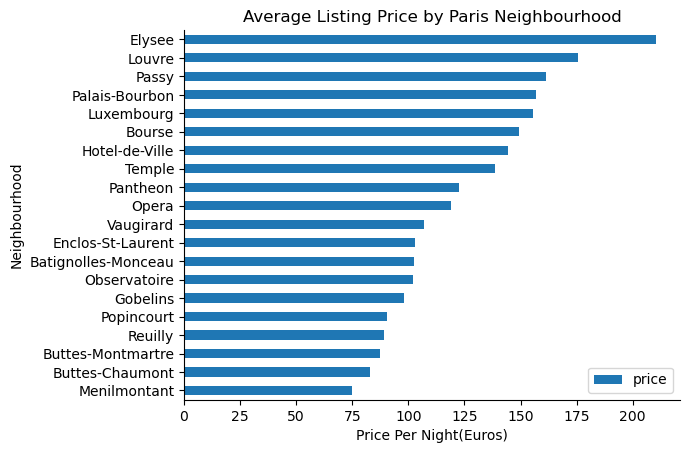

In [176]:
import seaborn as sns

(paris_df_neighbourhood
 .plot
 .barh(title="Average Listing Price by Paris Neighbourhood",
 xlabel="Price Per Night(Euros)",
 ylabel = "Neighbourhood"
)
)
sns.despine()

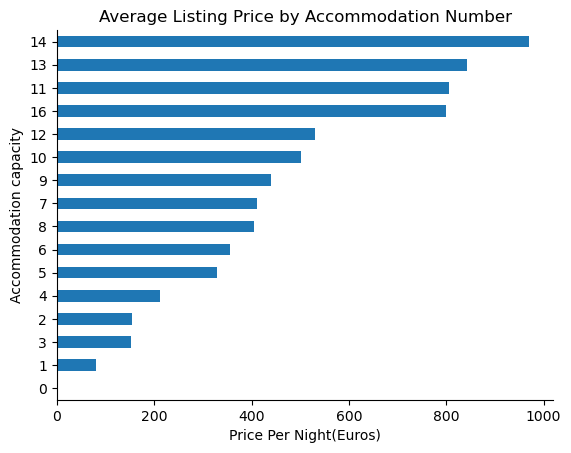

In [178]:
(paris_df_accommodates
 .plot
 .barh(title="Average Listing Price by Accommodation Number",
 xlabel="Price Per Night(Euros)",
 ylabel = "Accommodation capacity",
 legend=None
)
)
sns.despine()

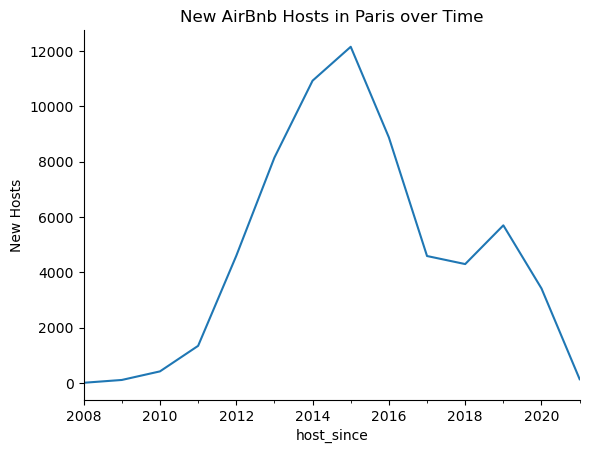

In [180]:
paris_df_over_time["neighbourhood"].plot(
ylabel="New Hosts",
title="New AirBnb Hosts in Paris over Time"
)
sns.despine()

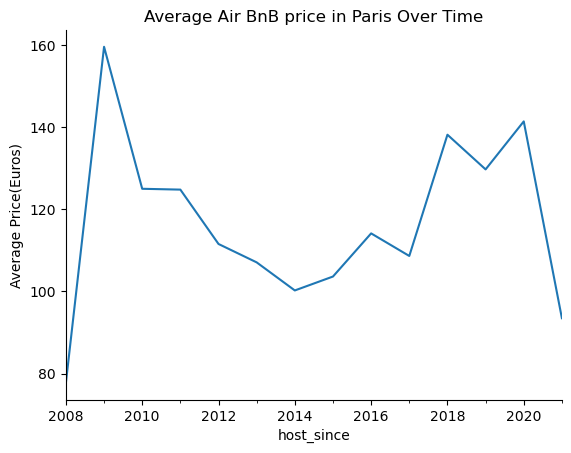

In [193]:
paris_df_over_time["price"].plot(
ylabel="Average Price(Euros)",
title="Average Air BnB price in Paris Over Time"
)
sns.despine()

##### CREATE A DUAL AXIS LINE CHART THAT CONTAINS BOTH NEW HOSTS AND AVERAGE PRICE OVER TIME

Text(0.5, 1.0, '2015 Regulations lead to fewer new hosts,Higher Prices')

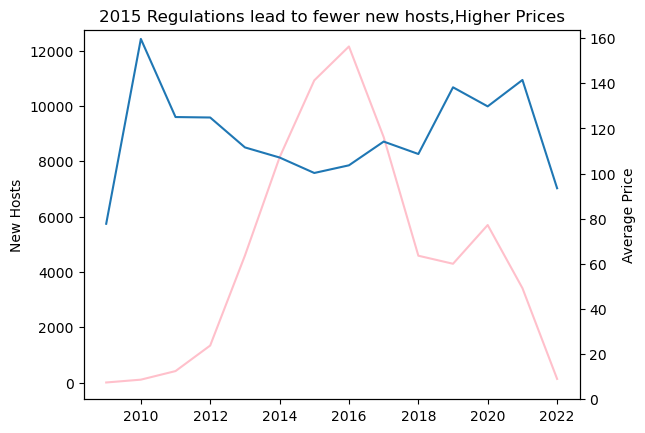

In [223]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(
    paris_df_over_time.index,
    paris_df_over_time["neighbourhood"],
    label="New Hosts",
    c="pink"
)
ax.set_ylabel("New Hosts")

ax2 = ax.twinx()

ax2.plot(
    paris_df_over_time.index,
    paris_df_over_time["price"],
    label="Average Price",
)
ax2.set_ylim(0)
ax2.set_ylabel("Average Price")
ax.set_title("2015 Regulations lead to fewer new hosts,Higher Prices")